In [2]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
from mpmath import *
from qutip.solver.nonmarkov.transfertensor import ttmsolve


0.2573592353386405


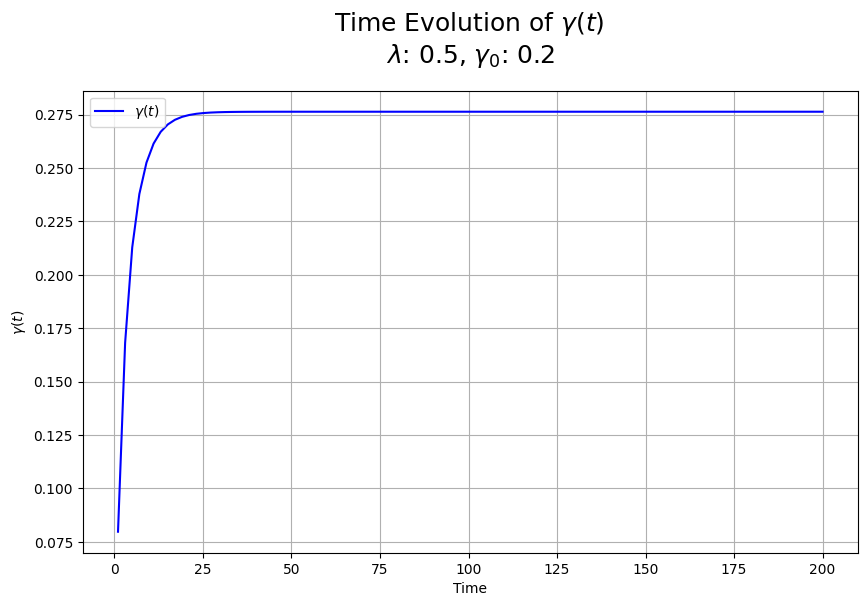

In [10]:

lam = 0.5

gamma_0 = 0.2

def Expr(t):
    l = np.emath.sqrt(lam**2 - 2*gamma_0*lam)

    expression = ((-l**2 + lam**2)*np.sinh(l*t/2))/(l*np.cosh(l*t/2) + lam*np.sinh(l*t/2))

    return expression
print(Expr(10))
def s(t):
    return np.imag(Expr(t))

#Define Hamiltonian

H0 = sigmam()*sigmap()

# Define gammma(t)

# def gam(t):
#     if np.real(Expr(t)) < 0 :
#         return np.sqrt(complex(np.real(Expr(t))))
#     else:
#         return np.sqrt(np.real(Expr(t)))       #np.sqrt(np.real(Expr(t)))

def gam(t):
    return np.real(Expr(t))


time = np.linspace(1, 200, 100)  # Adjust time range as needed

# Calculate gam values
gam_vals = [gam(t) for t in time]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, gam_vals, label=r'$\gamma(t)$', color='b')
plt.xlabel('Time')
plt.ylabel(r'$\gamma(t)$')
plt.title(f"Time Evolution of $\gamma(t)$ \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)
plt.legend()
plt.grid(True)
plt.show()

In [11]:

H0 = sigmam() * sigmap()

H = [H0,s]

ops_and_rates = [[sigmap(),gam]]  # time-dependent collapse term

c_ops = QobjEvo([sigmap(), gam])  # sigmap() with time-dependent rate

#s(10,args)
times = np.linspace(1,200, 100)

psi0 = (basis(2, 0) + basis(2, 1)).unit() 

# Define zero Hamiltonian
H_zero = Qobj(np.zeros((2, 2)))  # Zero operator for the Hamiltonian

#[[H0,s]]
e_ops = [sigmax(), sigmay(), sigmaz()]

#Construct SuperOperator
L0 = liouvillian(H_zero, c_ops)

# Set the number of learning steps (the number of times to compute dynamical maps)
num_learning = 5000

# Define the options for ttmsolve
options = {
    'store_states': True,      # Store states at each time step
    'normalize_output': True,  # Normalize states to avoid numerical errors
}


result2 = ttmsolve(L0, psi0, times, e_ops, num_learning, options)


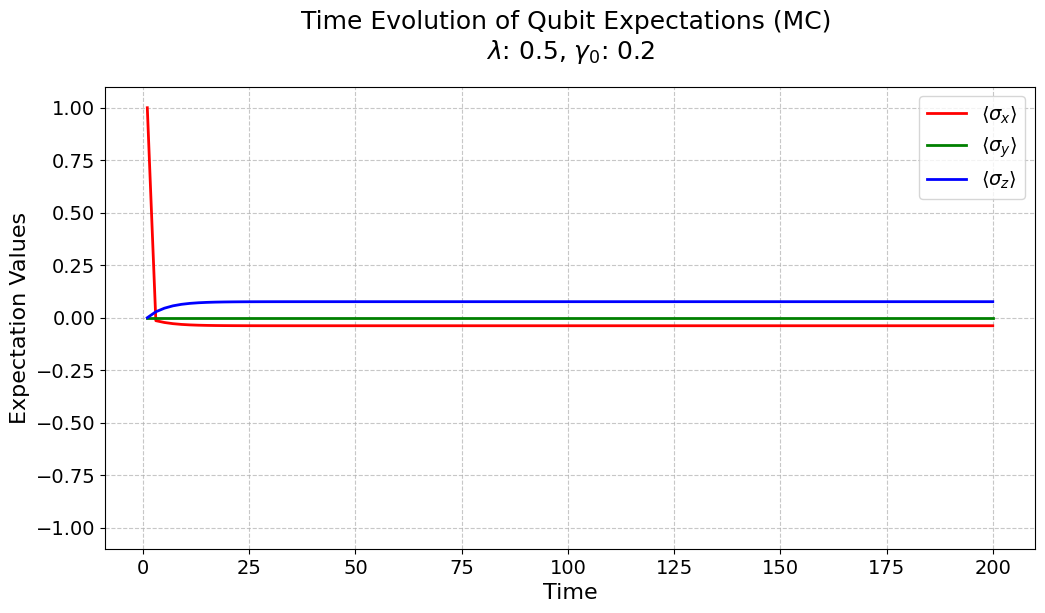

In [12]:

data = result2#mcsolve([[H0,s]], psi0, times, c_ops, e_ops, options = Options(store_states =True))
# Assuming result1.times and result1.expect are available

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the expectations with improved labels and colors
ax.plot(data.times, data.expect[0], 'r-', label=r'$\langle\sigma_x\rangle$', linewidth=2)
ax.plot(data.times, data.expect[1], 'g-', label=r'$\langle\sigma_y\rangle$', linewidth=2)
ax.plot(data.times, data.expect[2], 'b-', label=r'$\langle\sigma_z\rangle$', linewidth=2)

# Adding titles and labels with better formatting
ax.set_title(f"Time Evolution of Qubit Expectations (MC) \n$\lambda$: {lam}, $\gamma_0$: {gamma_0}", fontsize=18, pad=20)#("Time Evolution of Qubit Expectations(ME)" + "lam:":lam , , fontsize=18, pad=20)
ax.set_ylabel("Expectation Values", fontsize=16)
ax.set_xlabel("Time", fontsize=16)

# Adding a legend with improved positioning and font size
ax.legend(fontsize=14, loc='upper right')

# Adjusting y-axis limits for better visibility
ax.set_ylim(-1.1, 1.1)

# Adding a grid for better readability
ax.grid(True, linestyle='--', alpha=0.7)

# Adjusting tick parameters for better readability
ax.tick_params(axis='both', which='major', labelsize=14)

# Display the plot
plt.show()
